In [3]:
#environment
t = 0
dt = .1
t_max = 100
T_env = None
T_env_log =[]
time_log = []


#agent
T_agent_log =[]
T_agent = 120
T_equil = 98
g_agent = .01

while(t < t_max):
    #environment
        #exist
        T_env_log.append(T_env)
        time_log.append(t)
        
        #interact
        pass
        
        #advance
        t = t + dt
        
    #agent
        #exist
        T_agent_log.append(T_agent)
        
        #interact
        #monitor
        delta = T_agent - T_equil
        #decide
        step = g_agent*delta
        #act
        T_agent = T_agent -step
            

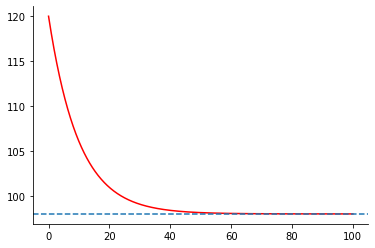

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.plot(time_log, T_env_log, 'g', label = 'environment_temp')
plt.plot(time_log, T_agent_log, 'r', label = 'agent_temp')
plt.axhline(T_equil, linestyle = '--')

sns.despine()

In [29]:
#environment
t = 0
dt = .1
t_max = 100
T_env = 98
T_env_log =[]
time_log = []
g_env = .01

generate_temp = lambda time: 98 if ((time < 50) or (time > 60)) else 79


#agent
T_agent_log =[]
T_agent = 120
T_equil = 98
g_agent = .01
margin = 2

while(t < t_max):
    #environment
        #exist
        T_env = generate_temp(t)
        T_env_log.append(T_env)
        time_log.append(t)
        
        #interact
        T_agent = T_agent - g_env*(T_agent - T_env)
        
        #advance
        t = t + dt
        
    #agent
        #exist
        T_agent_log.append(T_agent)
        
        #interact
        #monitor
        delta = T_agent - T_equil
        #decide
        if abs(delta) > margin:
            step = g_agent*delta
        #act
        T_agent = T_agent -step

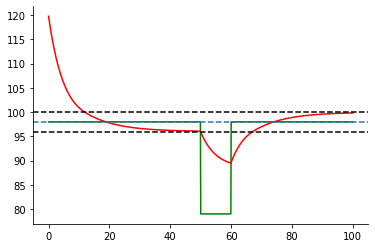

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.plot(time_log, T_env_log, 'g', label = 'environment_temp')
plt.plot(time_log, T_agent_log, 'r', label = 'agent_temp')
plt.axhline(T_equil, linestyle = '--')
plt.axhline(T_equil + margin, color = 'k', linestyle = '--')
plt.axhline(T_equil - margin, color  = 'k', linestyle = '--')


sns.despine()

In [74]:


class simple_env:
    def __init__(self, t_max = 100, T_init = 98, g = .01, dt = .01):

        
        self.dt = dt
        self.t_max = t_max
        self.T_env = T_init
        
        self.T_env_log =[]
        self.time_log = []
        self.g_env = g
        
        self.generate_temp = lambda time: 98 if ((time < 50) or (time > 60)) else 79
        self.t = 0

    def exist(self):
        self.T_env = self.generate_temp(self.t)
        
        self.T_env_log.append(self.T_env)
        self.time_log.append(self.t)


    def interact(self, agent):
        agent.T_agent = agent.T_agent - self.g_env*(agent.T_agent - self.T_env)

    def advance(self, agent):
        self.exist()
        self.interact(agent)
        self.t = self.t + self.dt
        
        agent.advance()


class simple_agent:
    def __init__(self, T_equil = 98, T_init = 120, g= .01, margin  = 2):
#agent
        self.T_agent_log = []
        self.T_agent = T_init
        self.T_equil = T_equil
        self.g_agent = g
        self.margin = margin 
        self.energy = 50
        self.energy_log = []
        self.dead = False
        
    #agent
    def exist(self):
        #exist
        self.T_agent_log.append(self.T_agent)
        self.energy_log.append(self.energy)
        if self.energy < 0:
            self.dead = True
        
        
    def monitor(self):
        return self.T_agent - self.T_equil
    
    def update(self, step):
        self.energy -= .1
        self.T_agent = self.T_agent - step
    
    def interact(self):
        #monitor
        delta = self.monitor()
        #decide
        
 
        if abs(delta) > self.margin:
            step = self.g_agent*delta
            self.update(step)
    
    def advance(self):
        self.exist()
        self.interact()
        

        
agent = simple_agent(g = .05, margin = 2)
env = simple_env()

while(env.t < env.t_max and not agent.dead):
    env.advance(agent)

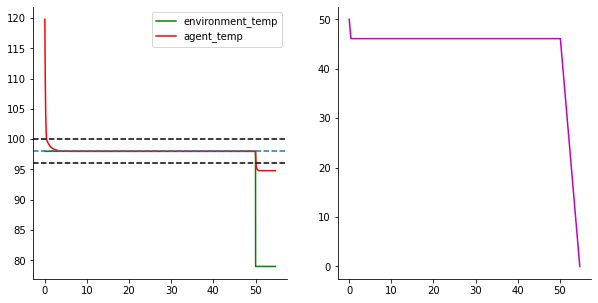

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = [10, 5])

plt.subplot(121)
plt.plot(env.time_log, env.T_env_log, 'g', label = 'environment_temp')
plt.plot(env.time_log, agent.T_agent_log, 'r', label = 'agent_temp')
plt.axhline(agent.T_equil, linestyle = '--')
plt.axhline(agent.T_equil + margin, color = 'k', linestyle = '--')
plt.axhline(agent.T_equil - margin, color  = 'k', linestyle = '--')
plt.legend()
sns.despine()

plt.subplot(122)
plt.plot(env.time_log, agent.energy_log, 'm', label= 'energy_log')
sns.despine()
